## Exploratory Data Analysis for Airbnb New User Bookings datasets

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

### loading datasets

In [3]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
sessions = pd.read_csv('sessions.csv')
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

In [4]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
age_gender_bkts.shape

(420, 5)

In [6]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.85,133.28,15297.74,7.74e+06,eng,0.00
1,CA,62.39,-96.82,2828.13,9.98e+06,eng,0.00
2,DE,51.17,10.45,7879.57,3.57e+05,deu,72.61
3,ES,39.90,-2.49,7730.72,5.05e+05,spa,92.25
4,FR,46.23,2.21,7682.94,6.44e+05,fra,92.06


In [7]:
countries.shape

(10, 7)

In [8]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [9]:
sessions.shape

(10567737, 6)

In [10]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [11]:
train_users.shape

(213451, 16)

## Data Wrangling
### Preprocessing
#### 1. Train Users Dataset

In [12]:
data1 = train_users.copy()
data1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### Check for duplicates

In [14]:
data1.duplicated().sum()

0

dataset has no duplicates

### Exploring the descriptive statistics of the variables

In [15]:
data1.describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.13e+05,88908,213451,125461.00,213451,213451.00,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,gxn3p5htnn,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.01e+13,NaN,NaN,49.67,NaN,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.25e+09,NaN,NaN,155.67,NaN,7.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.01e+13,NaN,NaN,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.01e+13,NaN,NaN,28.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.01e+13,NaN,NaN,34.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.01e+13,NaN,NaN,43.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for missing values

In [16]:
data1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Exploring variables
### 1. Categorical variables

#### Gender

In [17]:
data1['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

`-unknown-` will be treated as missing value so I will map these values to np.NaN

In [18]:
data1['gender'] = data1['gender'].replace('-unknown-', np.nan)
data1['gender'].unique()

array([nan, 'MALE', 'FEMALE', 'OTHER'], dtype=object)

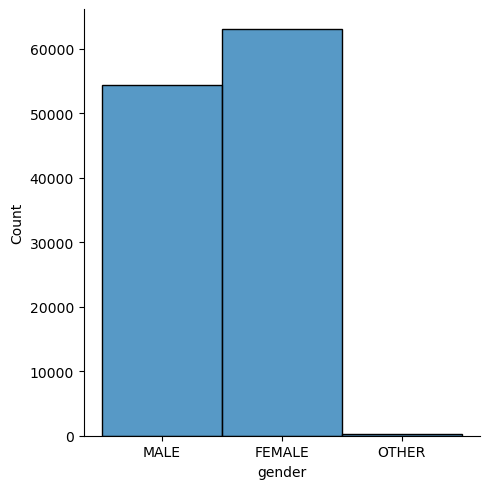

In [19]:
sns.displot(data1['gender'])

In [20]:
data1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

#### Signup method

In [21]:
data1['signup_method'].unique()

array(['facebook', 'basic', 'google'], dtype=object)

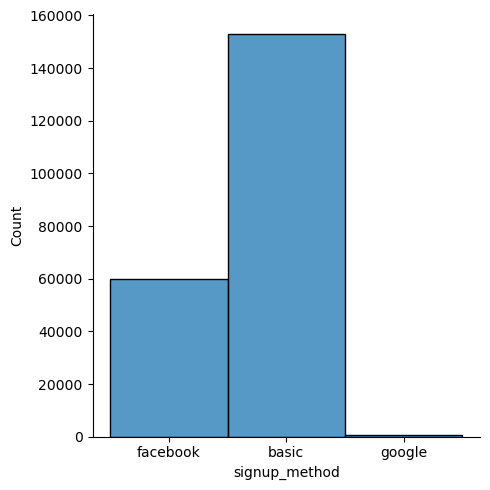

In [22]:
sns.displot(data1['signup_method'])

#### Language

In [23]:
data1['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

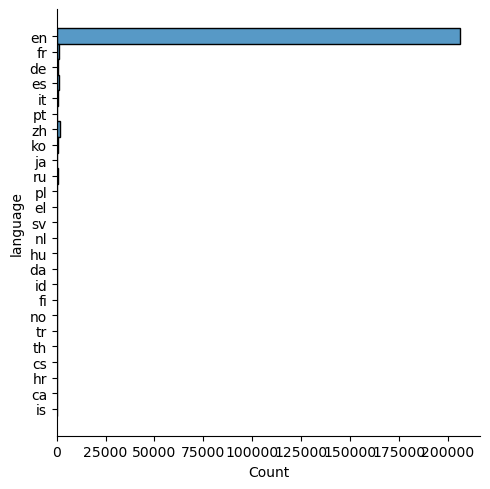

In [24]:
sns.displot(y=data1['language'])

#### Affiliate channel

In [25]:
data1['affiliate_channel'].unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

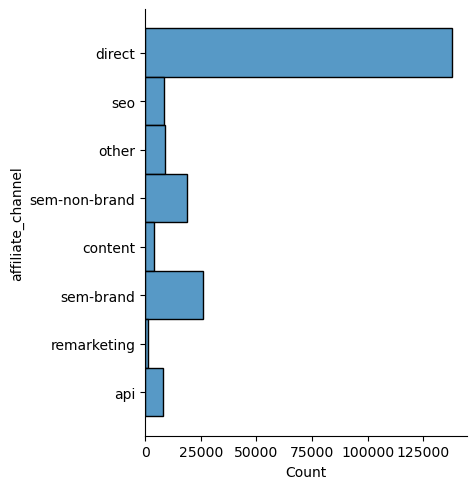

In [26]:
sns.displot(y=data1['affiliate_channel'])

#### Affiliate provider

In [27]:
data1['affiliate_provider'].unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

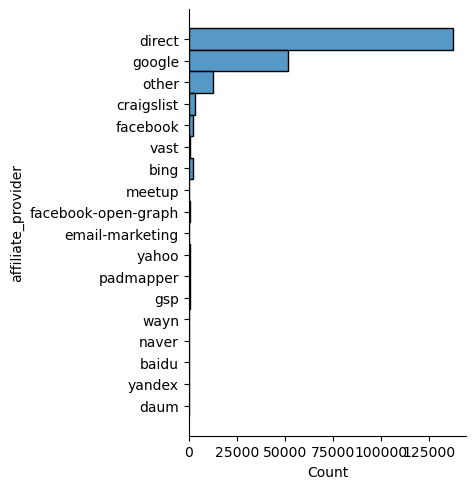

In [28]:
sns.displot(y=data1['affiliate_provider'])

#### First affiliate tracked

In [29]:
data1['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

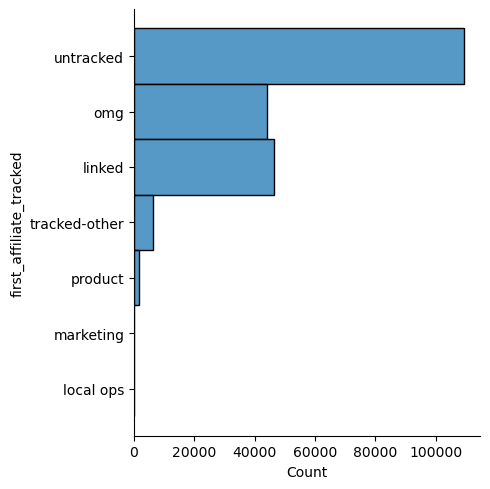

In [30]:
sns.displot(y=data1['first_affiliate_tracked'])

#### Signup app

In [31]:
data1['signup_app'].unique()

array(['Web', 'Moweb', 'iOS', 'Android'], dtype=object)

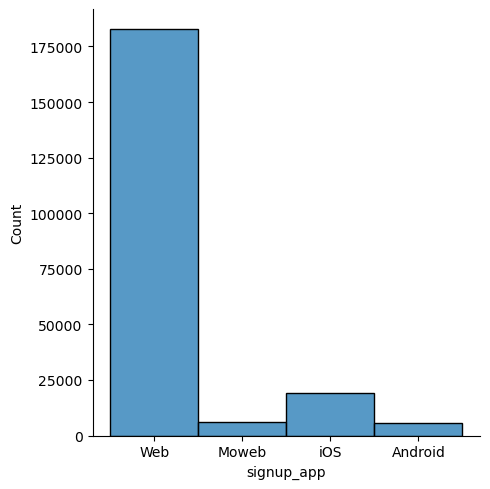

In [32]:
sns.displot(data1['signup_app'])

#### First device type

In [33]:
data1['first_device_type'].unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

In [34]:
data1[data1['first_device_type'] == 'Other/Unknown']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,NaN,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR
16,2dwbwkx056,2010-01-07,20100107215125,NaN,NaN,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
17,frhre329au,2010-01-07,20100107224625,2010-01-09,NaN,31.0,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,NaN,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,NaN,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212860,j5p2x3utn6,2014-06-29,20140629235643,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Other/Unknown,-unknown-,NDF
213202,queuas5jwo,2014-06-30,20140630172105,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Other/Unknown,-unknown-,NDF
213348,3dzbjhval7,2014-06-30,20140630210209,NaN,NaN,NaN,google,12,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,NDF
213400,x17avasiuk,2014-06-30,20140630223943,2014-08-04,MALE,53.0,basic,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,other


`Other/Unknown` will be treated as missing value so I will map these values to np.NaN

In [35]:
data1['first_device_type'] = data1['first_device_type'].replace('Other/Unknown', np.nan)

In [36]:
data1['first_device_type'].unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', nan, 'Desktop (Other)',
       'Android Tablet', 'iPad', 'Android Phone', 'SmartPhone (Other)'],
      dtype=object)

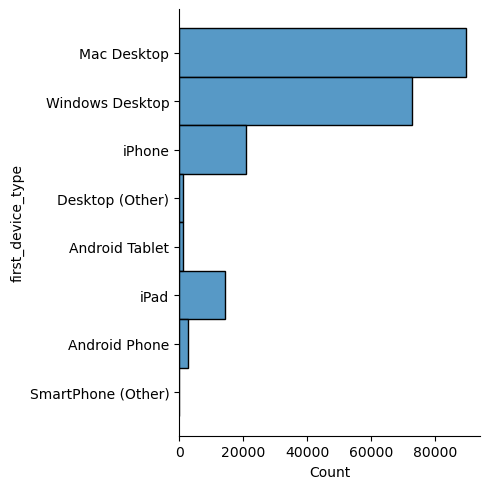

In [37]:
sns.displot(y=data1['first_device_type'])

In [38]:
data1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type           10667
first_browser                   0
country_destination             0
dtype: int64

#### First browser

In [39]:
data1['first_browser'].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

`-unknown-` will be treated as missing value so I will map these values to np.NaN

In [40]:
data1['first_browser'] = data1['first_browser'].replace('-unknown-', np.nan)

In [41]:
data1['first_browser'].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', nan, 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

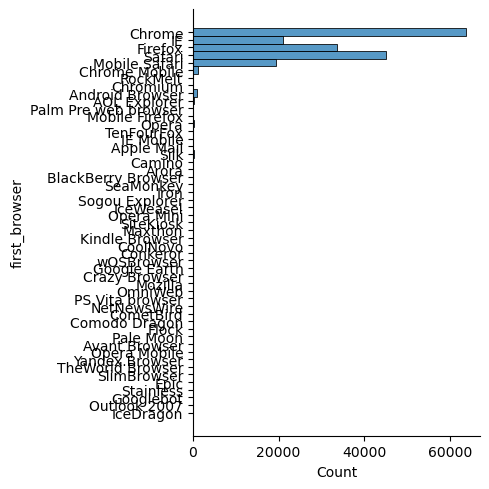

In [42]:
sns.displot(y=data1['first_browser'])

In [43]:
data1.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type           10667
first_browser               27266
country_destination             0
dtype: int64

#### Country destination

In [44]:
data1['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

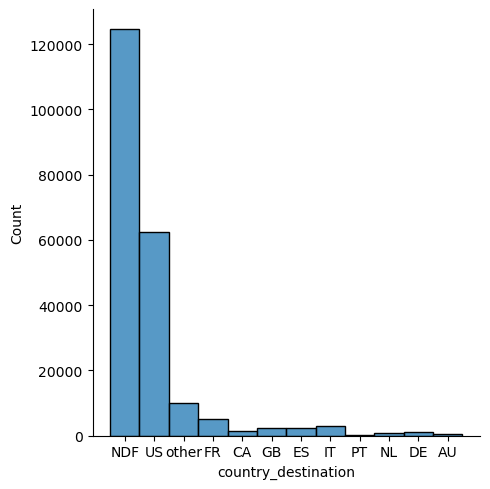

In [45]:
sns.displot(data1['country_destination'])

### 2. Numerical Variables

#### Date account created and Date first booking
convert these column from `object` to `datetime` format

In [46]:
data1['date_account_created'] = pd.to_datetime(data1['date_account_created'], format='%Y-%m-%d')
data1['date_first_booking'] = pd.to_datetime(data1['date_first_booking'], format='%Y-%m-%d')

In [47]:
data1[['date_account_created', 'date_first_booking']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date_account_created  213451 non-null  datetime64[ns]
 1   date_first_booking    88908 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.3 MB


#### Age

In [48]:
data1['age'].describe()

count    125461.00
mean         49.67
std         155.67
min           1.00
25%          28.00
50%          34.00
75%          43.00
max        2014.00
Name: age, dtype: float64

As we see from descriptive statistics of the `age`, the max value is `2014` which I think is wrong input (birth date instaed of age) so I will try to corret these values to avoid outliers.

In [49]:
data1['age'][data1['age'] > 150].unique()

array([2014., 2013., 1949., 1931., 1932., 1928., 1936., 1933., 1935.,
       1925., 1952., 1927., 1953., 1942., 1995., 2008., 1924., 1929.,
       1947., 1938., 1926.])

In [50]:
for i in range(data1.shape[0]):
    if data1.loc[i, 'age'] > 150:
        data1.loc[i, 'age'] = data1.loc[i, 'date_account_created'].year - data1.loc[i, 'age']

In [51]:
data1['age'][data1['age'] > 150].unique()

array([], dtype=float64)

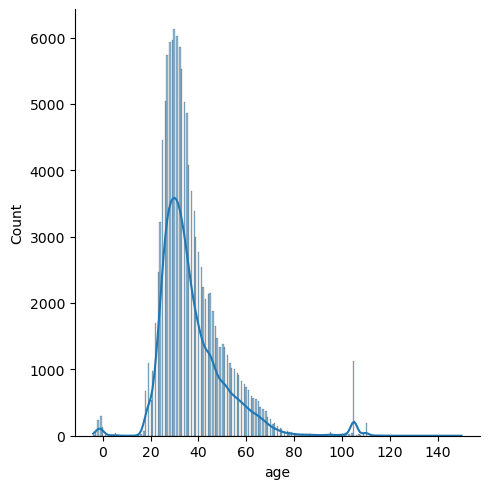

In [52]:
sns.displot(data1['age'], kde=True)

In [53]:
data1['age'].describe()

count    125461.00
mean         37.19
std          14.25
min          -4.00
25%          28.00
50%          34.00
75%          43.00
max         150.00
Name: age, dtype: float64

In [54]:
data1['age'].isnull().sum()

87990

In [55]:
age_mean = data1['age'].mean()
age_mean

37.190585122069805

In [56]:
age_mode = data1['age'].mode()[0]
age_mode

30.0

In [57]:
age_median = data1['age'].median()
age_median

34.0

As we see, **`age`** column has 87990 missing values, about **41.2%** of the dataset. But I think **`age`** is an important feature in prediction processe rows. Filling these missing values with **mean, mode or median** will affect the distribution of **`age`** column so lets use backward methode.

In [64]:
data1['age'] = data1['age'].fillna(method='bfill')

In [65]:
data1['age'].isnull().sum()

2

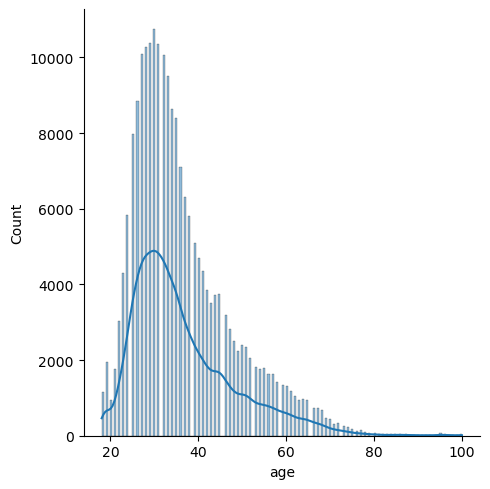

In [66]:
sns.displot(data1['age'], kde=True)

I think we can replace any `age` value less than **18** (website policy) and any value larger than **100** of the `age` column to **NaN**

In [67]:
for i in range(data1.shape[0]):
    if (data1.loc[i, 'age'] < 18) | (data1.loc[i, 'age'] > 100):
        data1.loc[i, 'age'] = np.nan

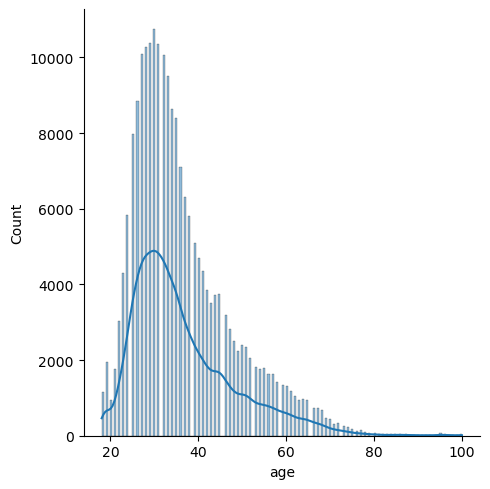

In [68]:
sns.displot(data1['age'], kde=True)

In [69]:
data1['age'].isnull().sum()

2